In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(['CustomerId','RowNumber','Surname'],axis='columns',inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.dtypes


CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [ ]:
df.shape

(10000, 11)

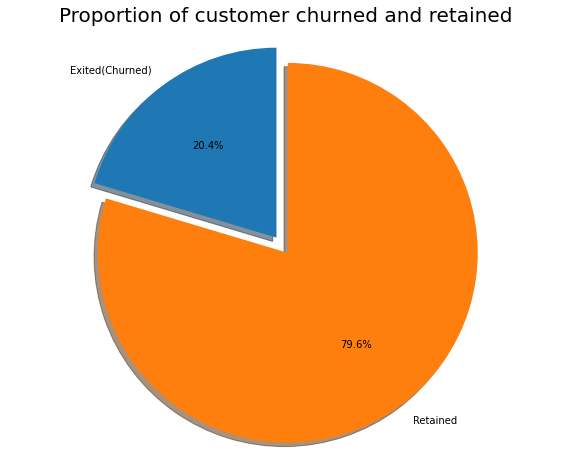

In [ ]:
#Pie chart

labels = 'Exited(Churned)', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [ ]:
import seaborn as sns

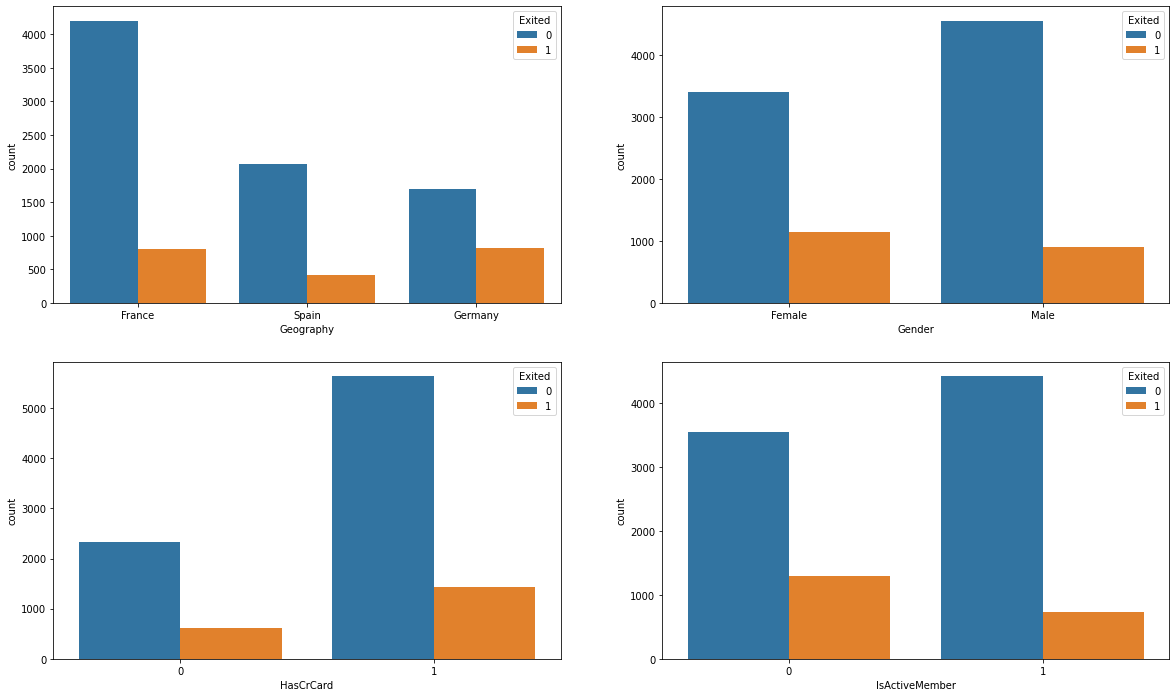

In [ ]:
    # Review the 'Status' relation with categorical variables
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
    sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

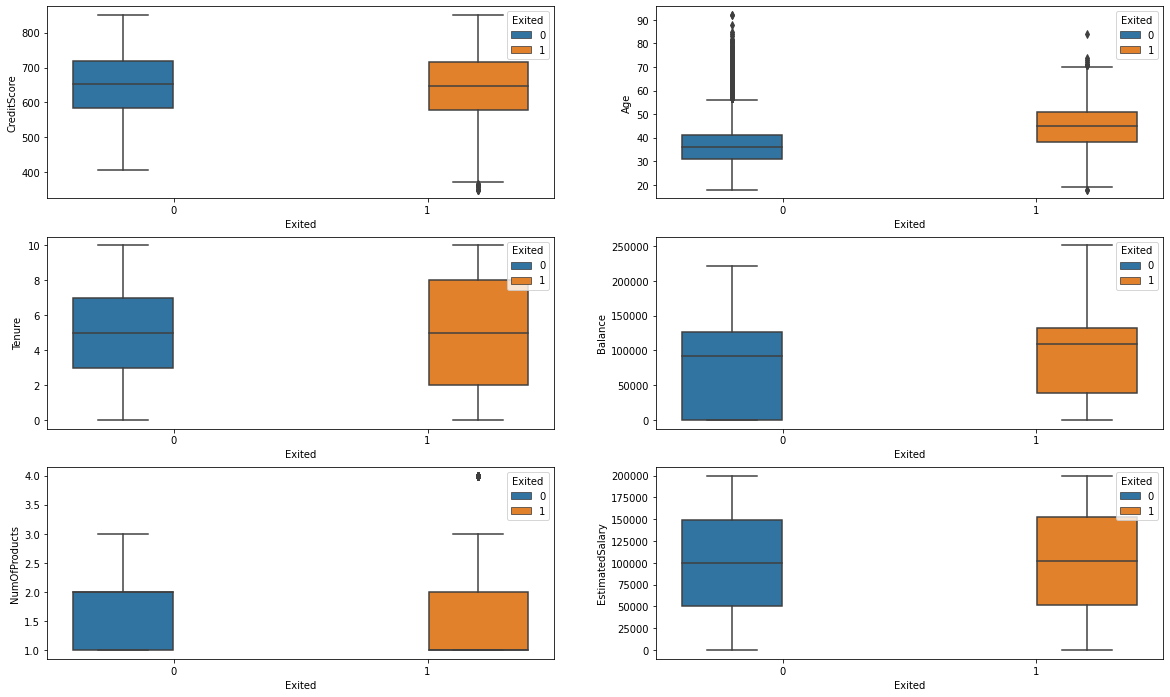

In [ ]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


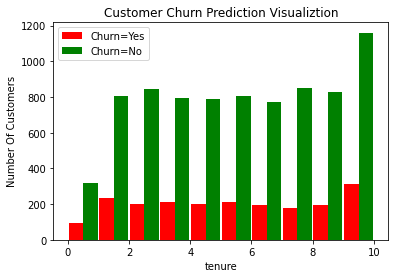

In [ ]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

(-1.0, 5.0)

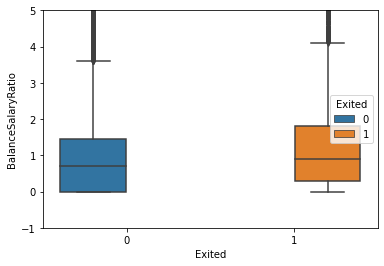

In [ ]:
#Feature Engineering
df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 5)

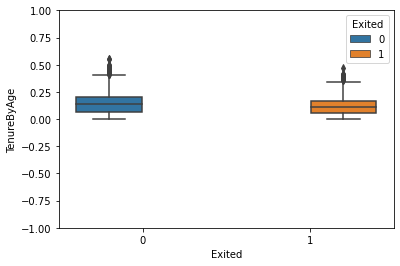

In [ ]:
df['TenureByAge'] = df.Tenure/(df.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 1)
plt.show()

In [ ]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [ ]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [ ]:
df['Gender'].replace({'Male': 1,'Female': 0},inplace=True)

In [ ]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,0,0,1


In [ ]:
scale_var = ['Tenure','CreditScore','Age','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[scale_var] = scaler.fit_transform(df1[scale_var])

In [ ]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0.000000,0.047619,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0.744677,0.024390,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1.401375,0.190476,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0.000000,0.025641,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,1.587055,0.046512,0,0,1


In [ ]:
X = df1.drop('Exited',axis='columns')  ##independent features
y = df1['Exited']  ##dependent feature

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
len(X_train.columns)

14

In [ ]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(None,32,14), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.6852 - accuracy: 0.7483
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5158 - accuracy: 0.7900
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4720 - accuracy: 0.7962
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4591 - accuracy: 0.8002
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4713 - accuracy: 0.8021
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4437 - accuracy: 0.8055
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4375 - accuracy: 0.8127
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4283 - accuracy: 0.8161
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4529 - accuracy: 0.8142
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4836 - accura

In [ ]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3717 - accuracy: 0.8440


[0.37174472212791443, 0.843999981880188]

In [ ]:
yp = model.predict(X_test)
yp

array([[0.03574717],
       [0.08559313],
       [0.06116635],
       ...,
       [0.01663479],
       [0.02273178],
       [0.10628739]], dtype=float32)

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred  

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


In [ ]:
#Accuracy
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1595
           1       0.69      0.42      0.52       405

    accuracy                           0.84      2000
   macro avg       0.78      0.69      0.71      2000
weighted avg       0.83      0.84      0.83      2000



Text(69.0, 0.5, 'Truth')

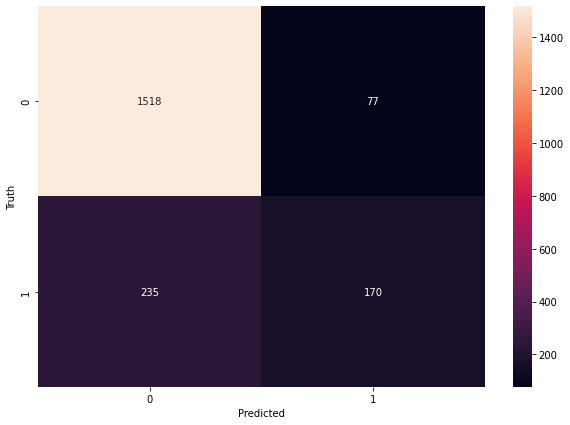

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Accuracy score on ANN is: ", accuracy_score(y_test,y_pred)*100,"%")

Accuracy score on ANN is:  84.39999999999999 %


In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.0 MB 39 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.3-py2.py3-none-any.whl size=177103819 sha256=945403ab721daa0a217491cd1c0f1a4f0f21ad861ac91aeacac2dc7ee2b3a747
  Stored in directory: /root/.cache/pip/wheels/64/86/0f/d54be71f64b85d238edb037069bc866f2156cc563bf02be527
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmps2ai7ef0
  JVM stdout: /tmp/tmps2ai7ef0/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmps2ai7ef0/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.3
H2O_cluster_version_age:,24 days
H2O_cluster_name:,H2O_from_python_unknownUser_kgs9gd
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
df = h2o.import_file("/content/drive/MyDrive/Churn_Modelling.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df.head()

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,1.56346e+07,Hargrave,619,France,Female,42,2,0,1,1,1,101349,1
2,1.56473e+07,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112543,0
3,1.56193e+07,Onio,502,France,Female,42,8,159661,3,1,0,113932,1
4,1.57014e+07,Boni,699,France,Female,39,1,0,2,0,0,93826.6,0
5,1.57379e+07,Mitchell,850,Spain,Female,43,2,125511,1,1,1,79084.1,0
6,1.5574e+07,Chu,645,Spain,Male,44,8,113756,2,1,0,149757,1
7,1.55925e+07,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0
8,1.56561e+07,Obinna,376,Germany,Female,29,4,115047,4,1,0,119347,1
9,1.57924e+07,He,501,France,Male,44,4,142051,2,0,1,74940.5,0
10,1.55924e+07,H?,684,France,Male,27,2,134604,1,1,1,71725.7,0


In [ ]:
df_train,df_test= df.split_frame(ratios=[.8])

In [ ]:
df_train

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,1.56346e+07,Hargrave,619,France,Female,42,2,0,1,1,1,101349,1
2,1.56473e+07,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112543,0
3,1.56193e+07,Onio,502,France,Female,42,8,159661,3,1,0,113932,1
4,1.57014e+07,Boni,699,France,Female,39,1,0,2,0,0,93826.6,0
5,1.57379e+07,Mitchell,850,Spain,Female,43,2,125511,1,1,1,79084.1,0
6,1.5574e+07,Chu,645,Spain,Male,44,8,113756,2,1,0,149757,1
7,1.55925e+07,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0
8,1.56561e+07,Obinna,376,Germany,Female,29,4,115047,4,1,0,119347,1
9,1.57924e+07,He,501,France,Male,44,4,142051,2,0,1,74940.5,0
10,1.55924e+07,H?,684,France,Male,27,2,134604,1,1,1,71725.7,0


In [ ]:
y = "Exited"  ## dependent variable
x = df.columns  ## Independent variable
x.remove(y)
x.remove('CustomerId')
x.remove('RowNumber')
x.remove('Surname')

In [ ]:
aml = H2OAutoML(max_runtime_secs=300,max_models = 10, seed = 10, verbosity="info", nfolds=2)

In [ ]:
aml.train(x=x,y=y, training_frame=df_train)

AutoML progress: |
17:40:38.65: Project: AutoML_1_20220801_174037
17:40:38.73: Setting stopping tolerance adaptively based on the training frame: 0.011155268706329005
17:40:38.73: Build control seed: 10
17:40:38.74: training frame: Frame key: AutoML_1_20220801_174037_training_py_3_sid_890a    cols: 14    rows: 8036  chunks: 8    size: 427930  checksum: -2834337590282493377
17:40:38.75: validation frame: NULL
17:40:38.75: leaderboard frame: NULL
17:40:38.75: blending frame: NULL
17:40:38.75: response column: Exited
17:40:38.82: fold column: null
17:40:38.82: weights column: null
17:40:38.134: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), grid_1 (4g, 30w), grid_2 (5g, 3

,,mean,sd,cv_1_valid,cv_2_valid
0,mae,0.206647,0.002776,0.208610,0.204684
1,mean_residual_deviance,0.100504,0.004715,0.103837,0.097170
2,mse,0.100504,0.004715,0.103837,0.097170
3,null_deviance,649.343750,4.894160,652.804440,645.883060
4,r2,0.378075,0.014419,0.367879,0.388271
5,residual_deviance,403.670470,12.405299,412.442350,394.898620
6,rmse,0.316980,0.007437,0.322238,0.311721
7,rmsle,0.222885,0.004213,0.225864,0.219906


In [ ]:
lb = aml.leaderboard

In [ ]:
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20220801_174037,0.316965,0.100467,0.20634,0.222924,0.100467
StackedEnsemble_BestOfFamily_1_AutoML_1_20220801_174037,0.317345,0.100708,0.207865,0.223413,0.100708
GBM_1_AutoML_1_20220801_174037,0.318438,0.101403,0.210634,0.224185,0.101403
GBM_2_AutoML_1_20220801_174037,0.319542,0.102107,0.206553,0.224548,0.102107
GBM_3_AutoML_1_20220801_174037,0.321545,0.103391,0.20983,0.226062,0.103391
GBM_4_AutoML_1_20220801_174037,0.323218,0.10447,0.212176,0.22776,0.10447
XGBoost_3_AutoML_1_20220801_174037,0.325577,0.106,0.213712,0.230482,0.106
DRF_1_AutoML_1_20220801_174037,0.326311,0.106479,0.212516,0.230654,0.106479
XRT_1_AutoML_1_20220801_174037,0.338224,0.114395,0.248725,0.241712,0.114395
XGBoost_1_AutoML_1_20220801_174037,0.35167,0.123672,0.239516,0.255158,0.123672


In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [ ]:
model_ids

['StackedEnsemble_AllModels_1_AutoML_1_20220801_174037',
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20220801_174037',
 'GBM_1_AutoML_1_20220801_174037',
 'GBM_2_AutoML_1_20220801_174037',
 'GBM_3_AutoML_1_20220801_174037',
 'GBM_4_AutoML_1_20220801_174037',
 'XGBoost_3_AutoML_1_20220801_174037',
 'DRF_1_AutoML_1_20220801_174037',
 'XRT_1_AutoML_1_20220801_174037',
 'XGBoost_1_AutoML_1_20220801_174037',
 'XGBoost_2_AutoML_1_20220801_174037',
 'GLM_1_AutoML_1_20220801_174037']

In [ ]:
aml.leader.model_performance(df_test)


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.11192075986876374
RMSE: 0.3345456020765536
MAE: 0.21691836981054174
RMSLE: 0.2344639218526846
R^2: 0.3212029978871801
Mean Residual Deviance: 0.11192075986876374
Null degrees of freedom: 1963
Residual degrees of freedom: 1956
Null deviance: 323.88929533376546
Residual deviance: 219.81237238225197
AIC: 1290.5009496494456


In [ ]:
h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_1_20220801_174037

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.07343574961080594
RMSE: 0.27099031276192503
MAE: 0.1737326970610291
RMSLE: 0.18838941136060983
R^2: 0.5454198318978869
Mean Residual Deviance: 0.07343574961080594
Null degrees of freedom: 8035
Residual degrees of freedom: 8028
Null deviance: 1298.1861622698134
Residual deviance: 590.1296838724365
AIC: 1838.4164267880376

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10046700651913613
RMSE: 0.31696530806877926
MAE: 0.206339781016408
RMSLE: 0.22292356858000376
R^2: 0.3780916113169942
Mean Residual Deviance: 0.10046700651913613
Null degrees of freedom: 8035
Residual degrees of freedom: 8029
Null deviance: 1298.6874426568236
Residual deviance: 807.352864387778
AIC: 4355.047583511466

Cross-Validation Metric

,,mean,sd,cv_1_valid,cv_2_valid
0,mae,0.206647,0.002776,0.208610,0.204684
1,mean_residual_deviance,0.100504,0.004715,0.103837,0.097170
2,mse,0.100504,0.004715,0.103837,0.097170
3,null_deviance,649.343750,4.894160,652.804440,645.883060
4,r2,0.378075,0.014419,0.367879,0.388271
5,residual_deviance,403.670470,12.405299,412.442350,394.898620
6,rmse,0.316980,0.007437,0.322238,0.311721
7,rmsle,0.222885,0.004213,0.225864,0.219906


In [ ]:
output= h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])
output.params

{'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'base_models': {'actual': [{'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_1_AutoML_1_20220801_174037',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_2_AutoML_1_20220801_174037',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_3_AutoML_1_20220801_174037',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_4_AutoML_1_20220801_174037',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'XGBoost_3_AutoML

In [ ]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_1_20220801_174037

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.07343574961080594
RMSE: 0.27099031276192503
MAE: 0.1737326970610291
RMSLE: 0.18838941136060983
R^2: 0.5454198318978869
Mean Residual Deviance: 0.07343574961080594
Null degrees of freedom: 8035
Residual degrees of freedom: 8028
Null deviance: 1298.1861622698134
Residual deviance: 590.1296838724365
AIC: 1838.4164267880376

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10046700651913613
RMSE: 0.31696530806877926
MAE: 0.206339781016408
RMSLE: 0.22292356858000376
R^2: 0.3780916113169942
Mean Residual Deviance: 0.10046700651913613
Null degrees of freedom: 8035
Residual degrees of freedom: 8029
Null deviance: 1298.6874426568236
Residual deviance: 807.352864387778
AIC: 4355.047583511466

Cross-Validation Metric

,,mean,sd,cv_1_valid,cv_2_valid
0,mae,0.206647,0.002776,0.208610,0.204684
1,mean_residual_deviance,0.100504,0.004715,0.103837,0.097170
2,mse,0.100504,0.004715,0.103837,0.097170
3,null_deviance,649.343750,4.894160,652.804440,645.883060
4,r2,0.378075,0.014419,0.367879,0.388271
5,residual_deviance,403.670470,12.405299,412.442350,394.898620
6,rmse,0.316980,0.007437,0.322238,0.311721
7,rmsle,0.222885,0.004213,0.225864,0.219906


In [ ]:
y_pred=aml.leader.predict(df_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
y_pred


predict
0.232647
0.235588
0.607775
0.110968
0.192955
0.342075
0.161734
0.73699
0.0324956
0.156143


In [ ]:
#Conclusion
#Stacked Ensemble provided with maximum accuracy
#Propotion of female churn was more hence female introduction of centered products might help to retain them

